In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.rename(index=str,columns={'Annual Income (k$)':'Income','Spending Score (1-100)': 'Score'},inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


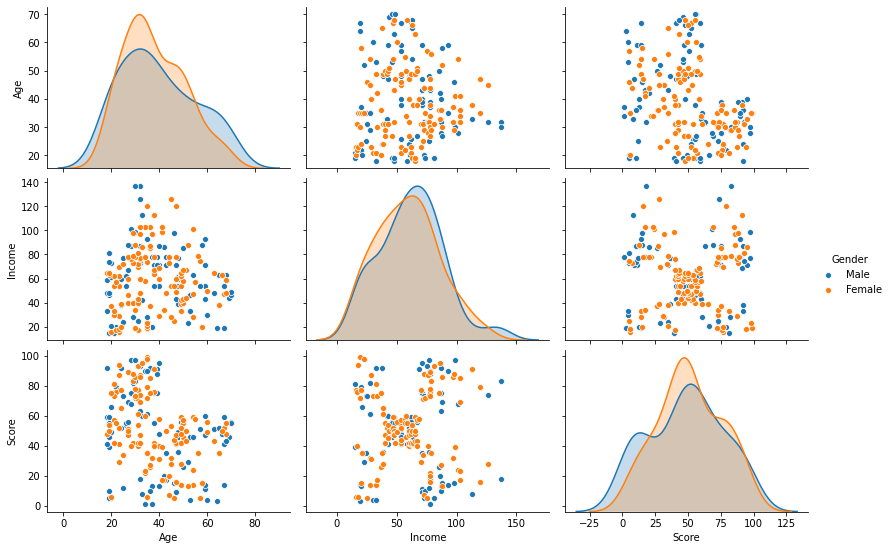

In [7]:
X=df.drop(['CustomerID','Gender'],axis=1)
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender',aspect=1.5)
plt.show()

Text(0, 0.5, 'Inertia')

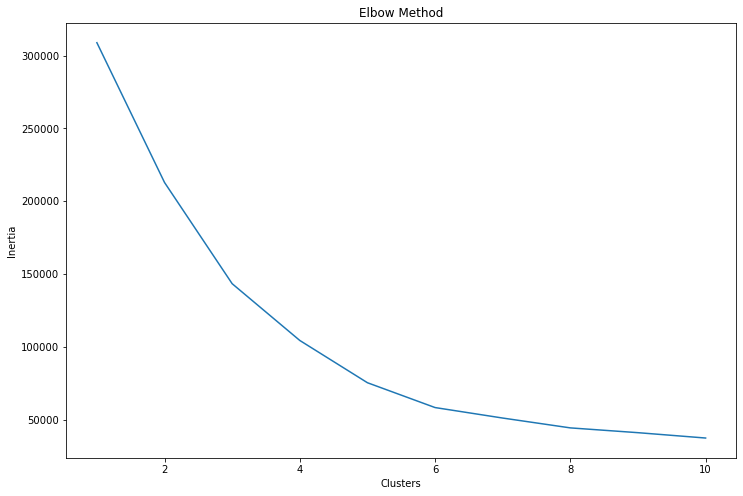

In [8]:
from sklearn.cluster import KMeans

clusters=[]

for i in range(1,11):
    km=KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax=plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

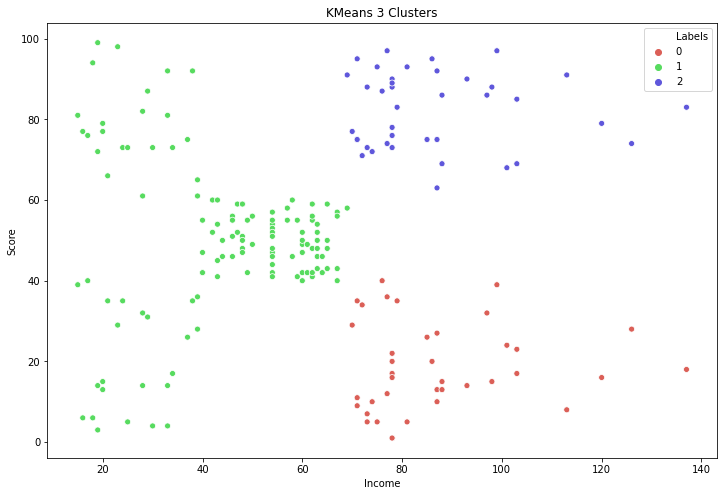

In [9]:
# 3 Clusters

km3=KMeans(n_clusters=3).fit(X)
X['Labels']=km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],
               palette=sns.color_palette('hls',3))
plt.title('KMeans 3 Clusters')
plt.show()

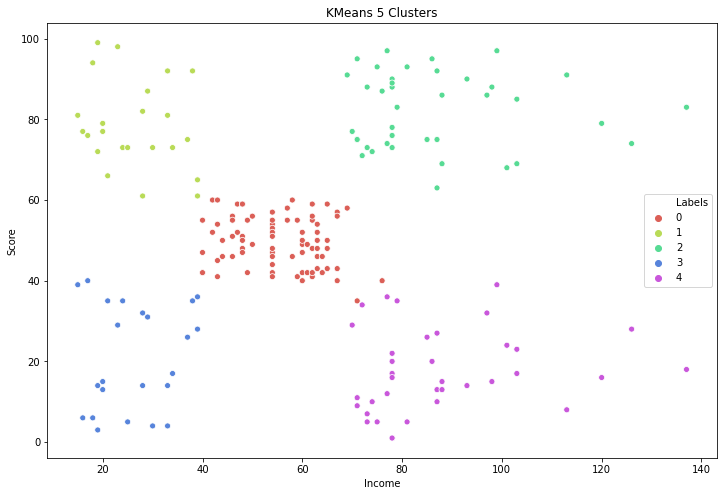

In [10]:
# 5 Clusters

km5=KMeans(n_clusters=5).fit(X)
X['Labels']=km5.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],
               palette=sns.color_palette('hls',5))
plt.title('KMeans 5 Clusters')
plt.show()

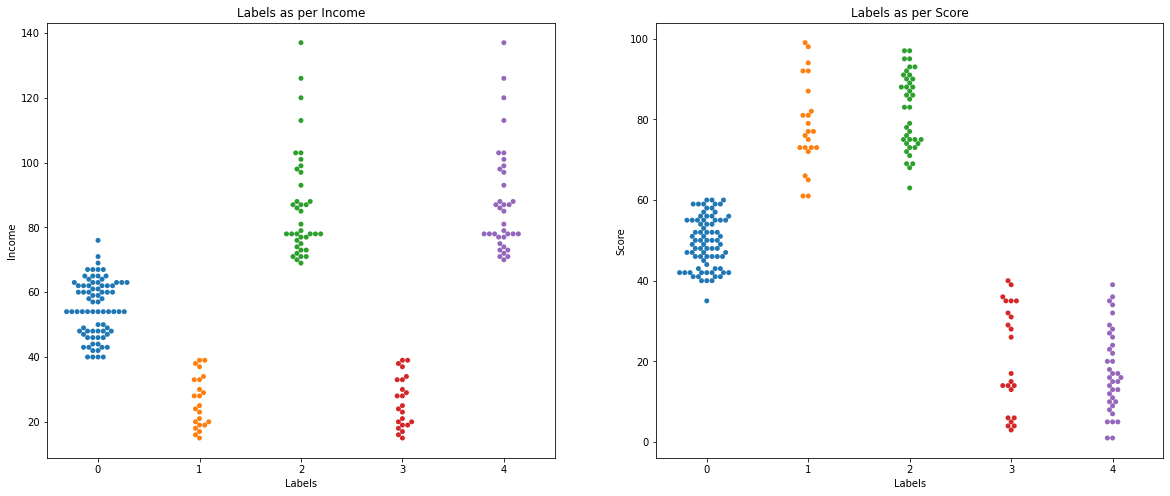

In [11]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(121)
sns.swarmplot(x='Labels',y='Income',data=X,ax=ax)
ax.set_title('Labels as per Income')

ax=fig.add_subplot(122)
sns.swarmplot(x='Labels',y='Score',data=X,ax=ax)
ax.set_title('Labels as per Score')

plt.show()

In [13]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

In [14]:
agglom=AgglomerativeClustering(n_clusters=5,linkage='average')

In [15]:
agglom=agglom.fit(X)

In [17]:
X['Labels']=agglom.labels_

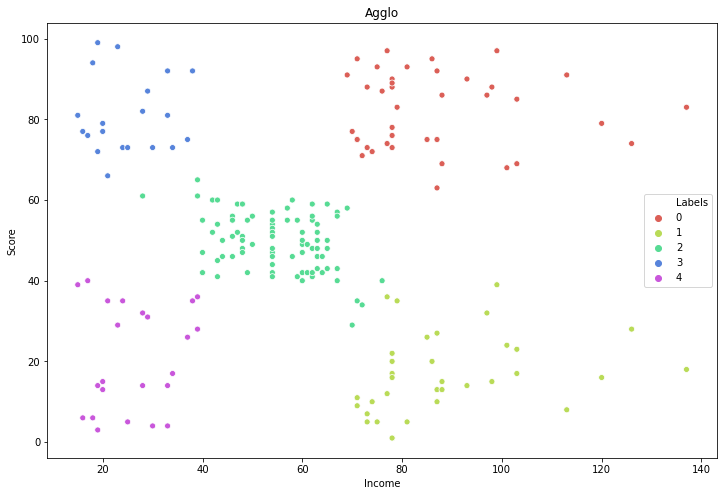

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],
               palette=sns.color_palette('hls',5))
plt.title('Agglo')
plt.show()

In [19]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [20]:
dist=distance_matrix(X,X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.17934972 124.51104369
  130.21904623]
 [ 42.05948169   0.          75.01999733 ... 111.80339887 137.76066202
  122.38463956]
 [ 33.03028913  75.01999733   0.         ... 129.93844697 122.22111111
  143.82628411]
 ...
 [117.17934972 111.80339887 129.93844697 ...   0.          57.07889277
   14.35270009]
 [124.51104369 137.76066202 122.22111111 ...  57.07889277   0.
   65.03845017]
 [130.21904623 122.38463956 143.82628411 ...  14.35270009  65.03845017
    0.        ]]


In [21]:
Z=hierarchy.linkage(dist,'complete')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


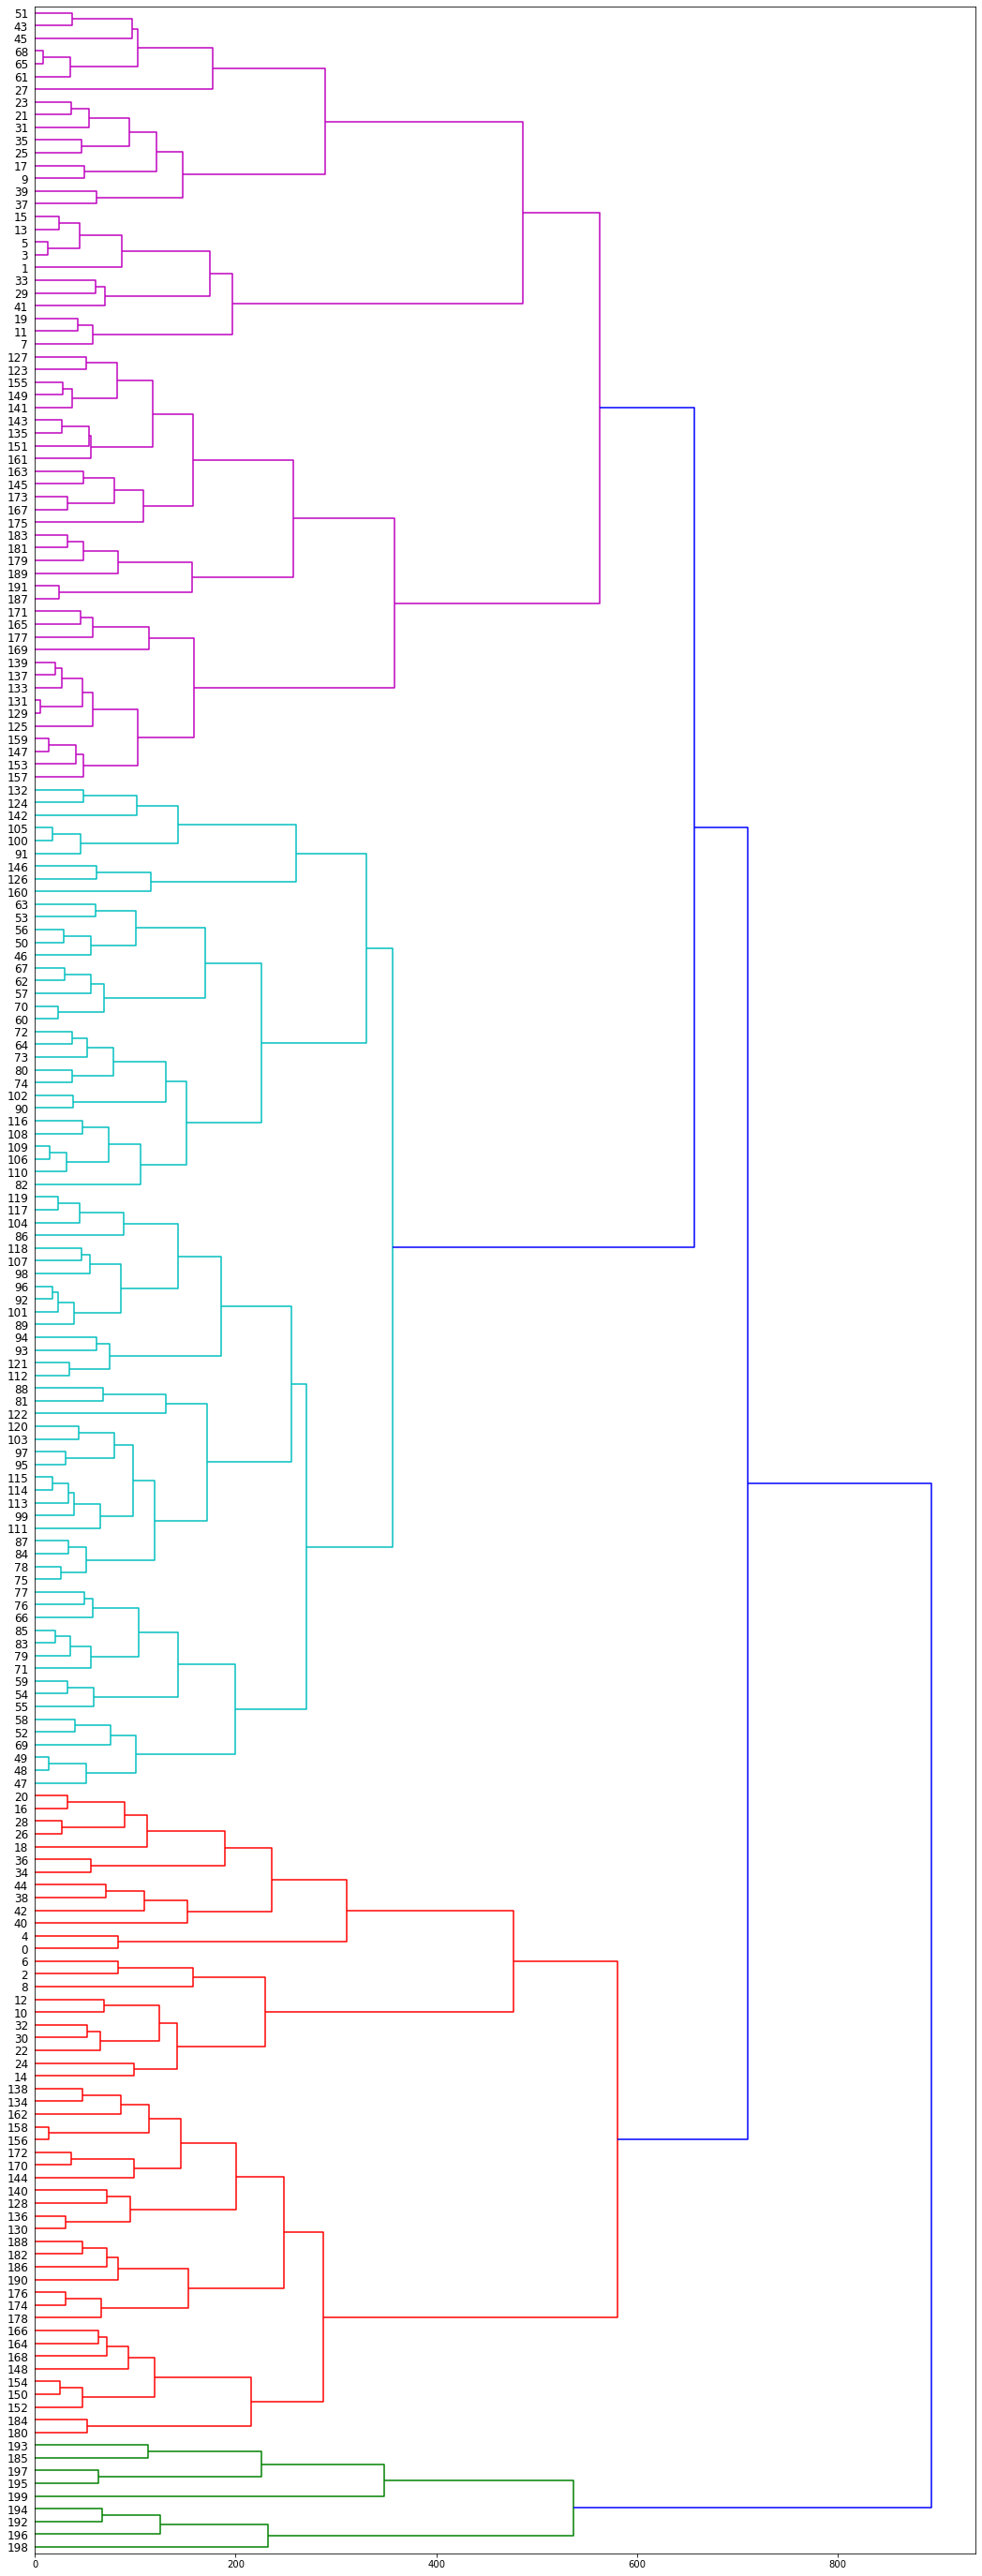

In [22]:
plt.figure(figsize=(18,50))
dendro=hierarchy.dendrogram(Z,leaf_rotation=0,leaf_font_size=12,orientation='right')

In [23]:
Z=hierarchy.linkage(dist,'average')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


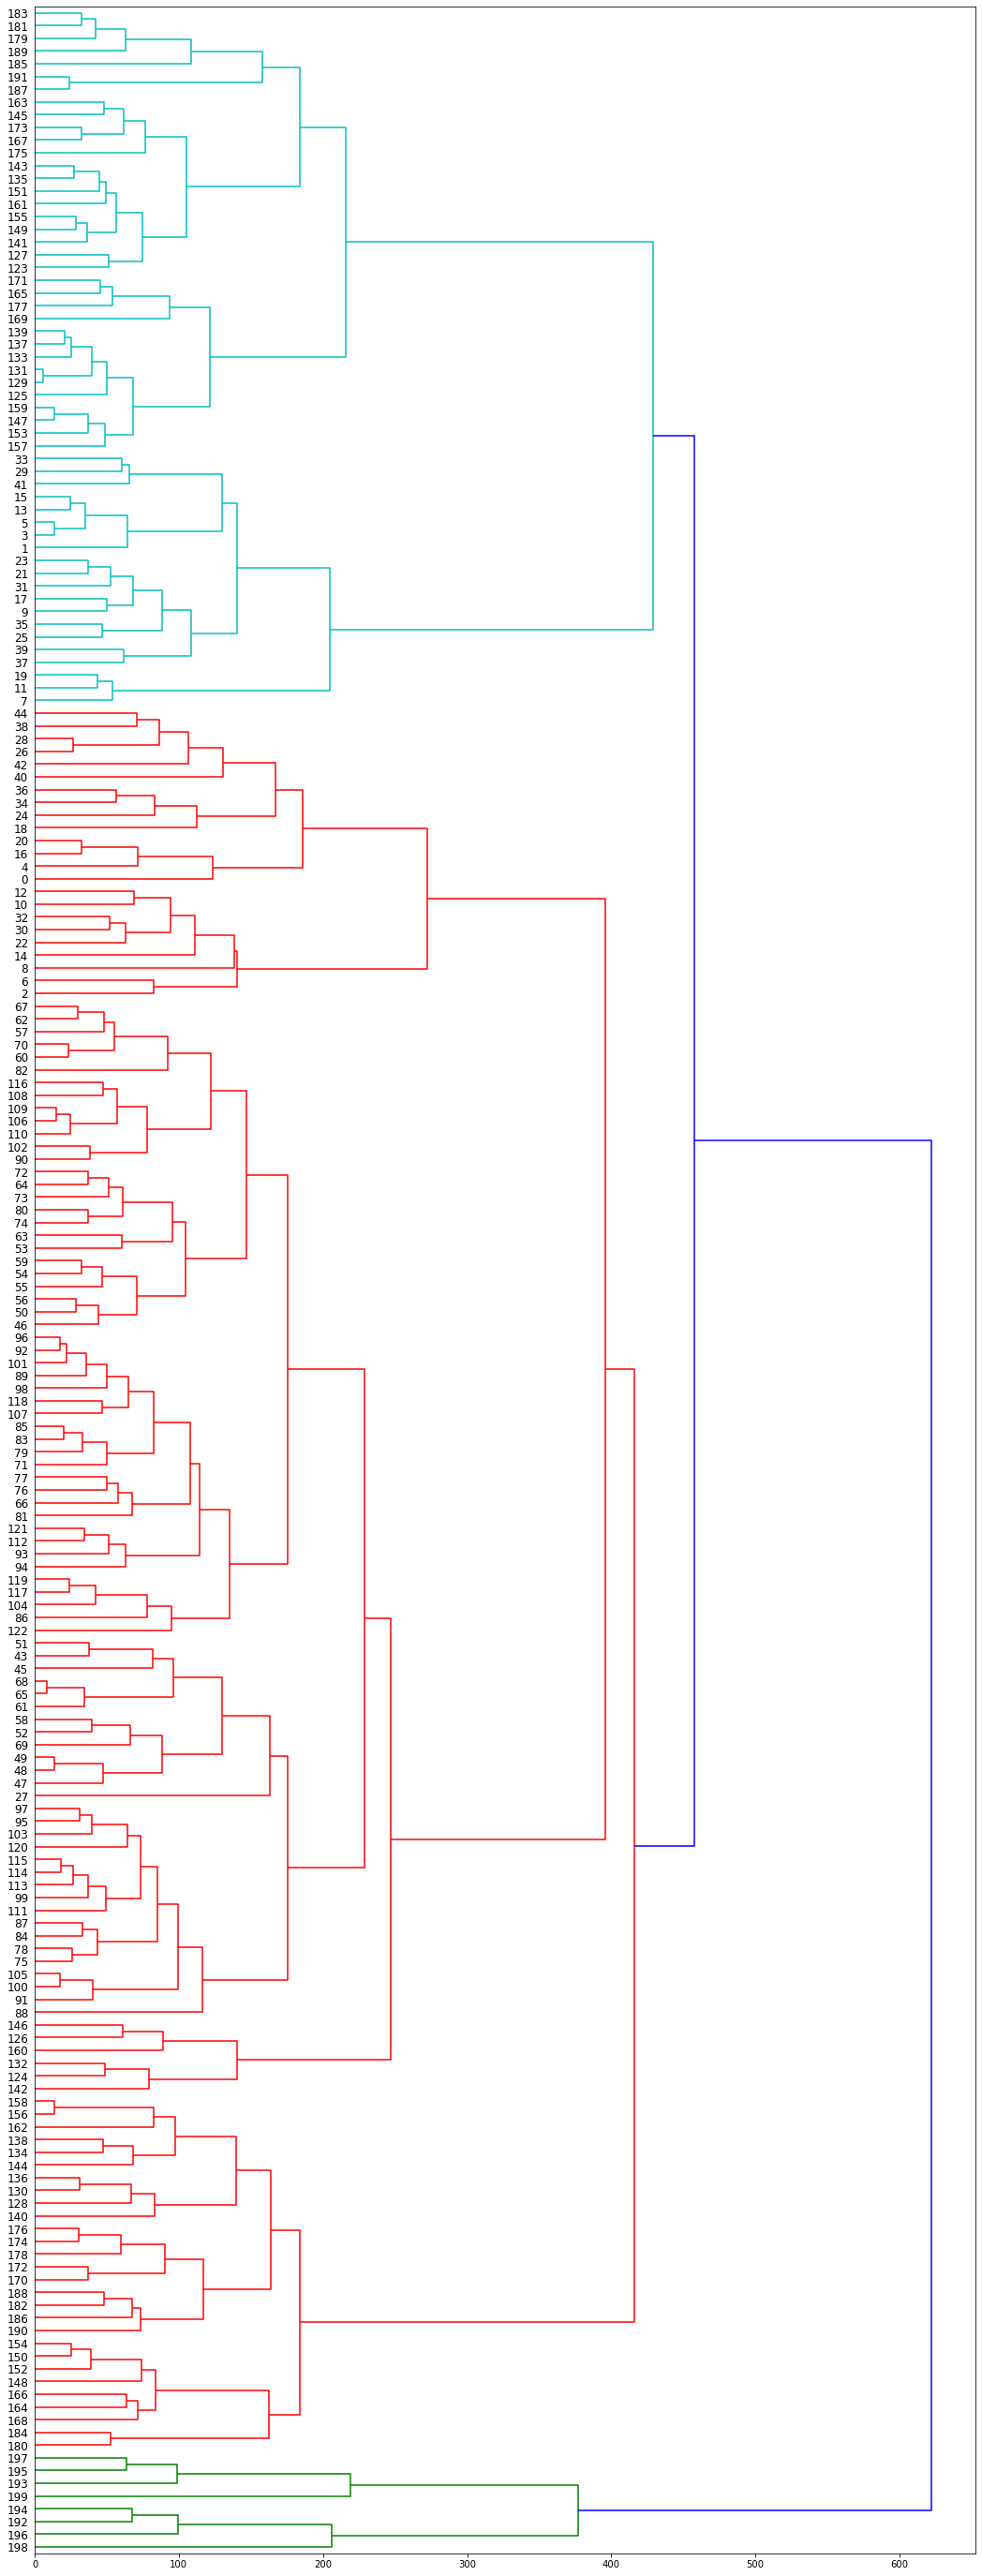

In [24]:
plt.figure(figsize=(18,50))
dendro=hierarchy.dendrogram(Z,leaf_rotation=0,leaf_font_size=12,orientation='right')

In [25]:
# DBScan

from sklearn.cluster import DBSCAN

In [37]:
db=DBSCAN(eps=11,min_samples=6).fit(X)

In [38]:
X['Labels']=db.labels_

In [39]:
X['Labels'].unique()

array([-1,  0,  1,  2,  3], dtype=int64)

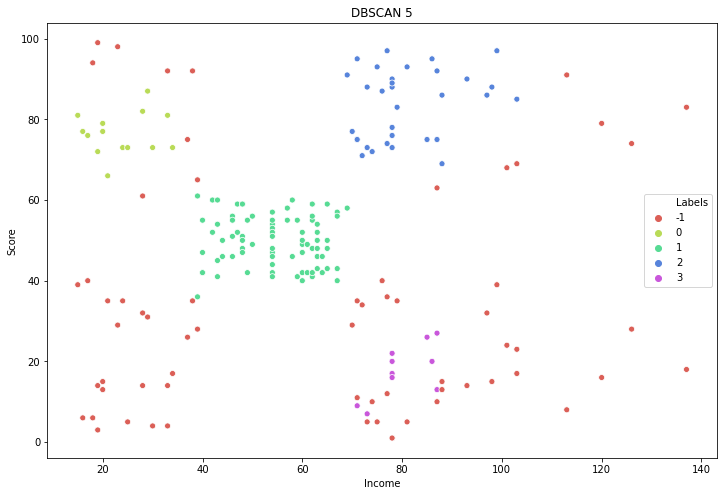

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],
               palette=sns.color_palette('hls',5))
plt.title('DBSCAN 5')
plt.show()